In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
homicides = pd.read_csv('database.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode', usecols=['Victim Sex','Victim Age', 'Victim Race', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Relationship'])

In [5]:
homicides.shape

(638454, 7)

In [491]:
homicides.dtypes

Victim Sex          object
Victim Age          object
Victim Race         object
Perpetrator Sex     object
Perpetrator Age     object
Perpetrator Race    object
Relationship        object
dtype: object

In [492]:
homicides['Perpetrator Age'] = homicides['Perpetrator Age'].replace(' ', '0')

In [493]:
homicides['Perpetrator Age'] = homicides['Perpetrator Age'].astype(int)
homicides['Victim Age'] = homicides['Victim Age'].astype(int)

In [499]:
homicides['Victim Age'] = homicides['Victim Age'].replace(998, 98)

In [496]:
homicides.dtypes

Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age      int64
Perpetrator Race    object
Relationship        object
dtype: object

In [122]:
original_headers = list(homicides)
headers = []

for item in original_headers:
    if ' ' in item:
        headers.append(item.replace(' ', '_').lower())
    else:
        headers.append(item.lower())

In [123]:
for i in range(len(headers)):
    vars()[headers[i]] = homicides[original_headers[i]].value_counts()

In [519]:
print('Victim Sex: \n{} \n\nPerpetrator Sex: \n{}'.format(victim_sex, perpetrator_sex))

Victim Sex: 
Male       494125
Female     143345
Unknown       984
Name: Victim Sex, dtype: int64 

Perpetrator Sex: 
Male       399541
Unknown    190365
Female      48548
Name: Perpetrator Sex, dtype: int64


In [509]:
perpetrator_sex.index[0]
data = [{'Male': perpetrator_sex.values[0], 'Female': perpetrator_sex.values[2], 'Unknown': perpetrator_sex.values[1]},
        {'Male': victim_sex.values[0], 'Female': victim_sex.values[1], 'Unknown': victim_sex.values[2]}]
sex_count = pd.DataFrame(data, index=['Prepetrator', 'Victim'])

In [510]:
sex_count

,Female,Male,Unknown
Prepetrator,48548,399541,190365
Victim,143345,494125,984


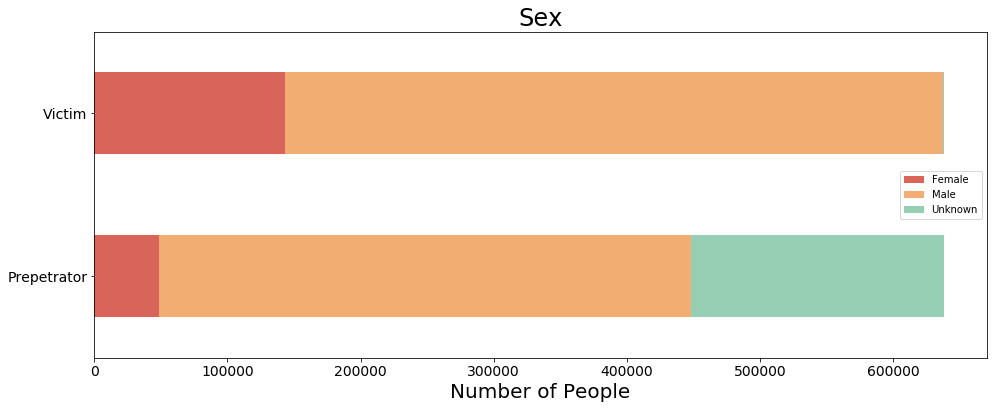

In [153]:
colors = ['#d96459', '#f2ae72', '#96ceb4']
ax = sex_count.plot.barh(figsize=[16,6], title="Sex", color=colors, stacked=True)
ax.set_xlabel("Number of People", fontsize=20)
ax.title.set_size(fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)

In [518]:
print('Victim Race: \n{} \n\nPerpetrator Race: \n{}'.format(victim_race, perpetrator_race))

Victim Race: 
White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: Victim Race, dtype: int64 

Perpetrator Race: 
White                            218243
Black                            214516
Unknown                          196047
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: Perpetrator Race, dtype: int64


In [145]:
data = [{'White': perpetrator_race.values[0], 'Black': perpetrator_race.values[1], 'Asian/Pacific Islander': perpetrator_race.values[3], 'Unknown': perpetrator_race.values[2], 'Native American/Alaska Native': perpetrator_race.values[4]},
        {'White': victim_race.values[0], 'Black': victim_sex.values[1], 'Asian/Pacific Islander': victim_race.values[2], 'Unknown': victim_race.values[3], 'Native American/Alaska Native': victim_race.values[4]}]

In [146]:
race_count = pd.DataFrame(data, index=['Prepetrator', 'Victim'])

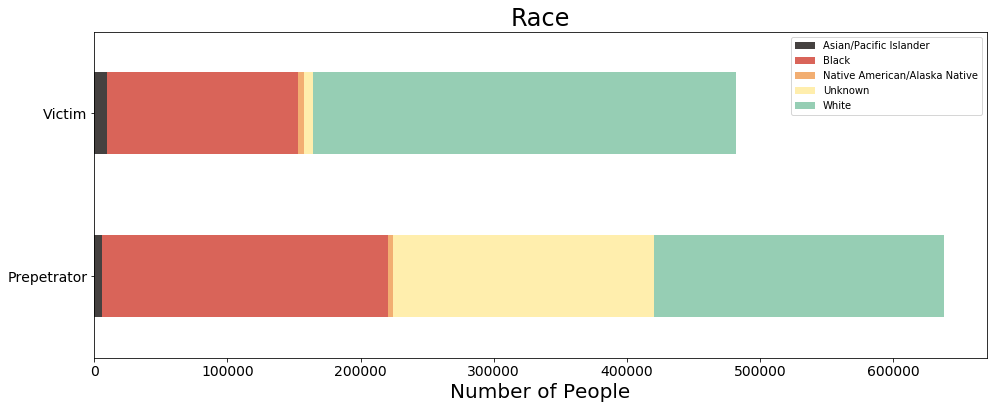

In [152]:
colors = ['#454140', '#d96459', '#f2ae72', '#ffeead', '#96ceb4']
ax = race_count.plot.barh(figsize=[16,6], title="Race", color=colors, stacked=True)
ax.set_xlabel("Number of People", fontsize=20)
ax.title.set_size(fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)

In [516]:
age_list = list(homicides['Victim Age'].value_counts().index)

In [382]:
def create_dictionary(data):
    age_d = {'Unknown': 0, '0 - 14': 0, '15 - 29': 0, '30 - 44': 0, '45 - 59': 0, '60 - 74': 0, '75 - 89': 0, '90 - 105': 0}
    if data == 'Victim':
        vict
        index_list = [x.replace(x, '-1') if x in filter_out else x for x in list(data.index)]
    else:
        index_list = list(data.index)
    age_list = list(map(int, index_list))
    count_list = list(data.values)
    for i in range(len(data)):
        if age_list[i] == -1:
            age_d['Unknown'] += count_list[i]
        if age_list[i] < 15:
            age_d['0 - 14'] += count_list[i]
        elif age_list[i] >= 15 and age_list[i] < 30:
            age_d['15 - 29'] += count_list[i]
        elif age_list[i] >= 30 and age_list[i] < 45:
            age_d['30 - 44'] += count_list[i]
        elif age_list[i] >= 45 and age_list[i] < 60:
            age_d['45 - 59'] += count_list[i]
        elif age_list[i] >= 60 and age_list[i] < 75:
            age_d['60 - 74'] += count_list[i]
        elif age_list[i] >= 75 and age_list[i] < 90:
            age_d['75 - 89'] += count_list[i]
        elif age_list[i] >= 90 and age_list[i] < 106:
            age_d['90 - 105'] += count_list[i]
    return age_d

In [385]:
victim_d = create_dictionary(victim_age)

In [517]:
print('Victim: \n{} \n\nPerpetrator: \n{}'.format(victim_d, perp_d))

Victim: 
{'Unknown': 0, '0 - 14': 34848, '15 - 29': 281998, '30 - 44': 187196, '45 - 59': 79323, '60 - 74': 31117, '75 - 89': 12624, '90 - 105': 10374} 

Perpetrator: 
{'Unknown': 216328, '0 - 14': 221235, '15 - 29': 233508, '30 - 44': 124325, '45 - 59': 43809, '60 - 74': 12243, '75 - 89': 3068, '90 - 105': 266}


In [383]:
perp_d = create_dictionary(perpetrator_age)

In [384]:
perp_d

{'0 - 14': 221235,
 '15 - 29': 233508,
 '30 - 44': 124325,
 '45 - 59': 43809,
 '60 - 74': 12243,
 '75 - 89': 3068,
 '90 - 105': 266,
 'Unknown': 216328}

In [388]:
age_df = pd.DataFrame([victim_d, perp_d], index=['Victim Age', 'Perpetrator Age'])

In [389]:
age_df

,0 - 14,15 - 29,30 - 44,45 - 59,60 - 74,75 - 89,90 - 105,Unknown
Victim Age,34848,281998,187196,79323,31117,12624,10374,0
Perpetrator Age,221235,233508,124325,43809,12243,3068,266,216328


In [348]:
list(age_df.values[1])

[4.14, 44.24, 29.36, 12.44, 4.88, 1.98, 1.63, 1.32]

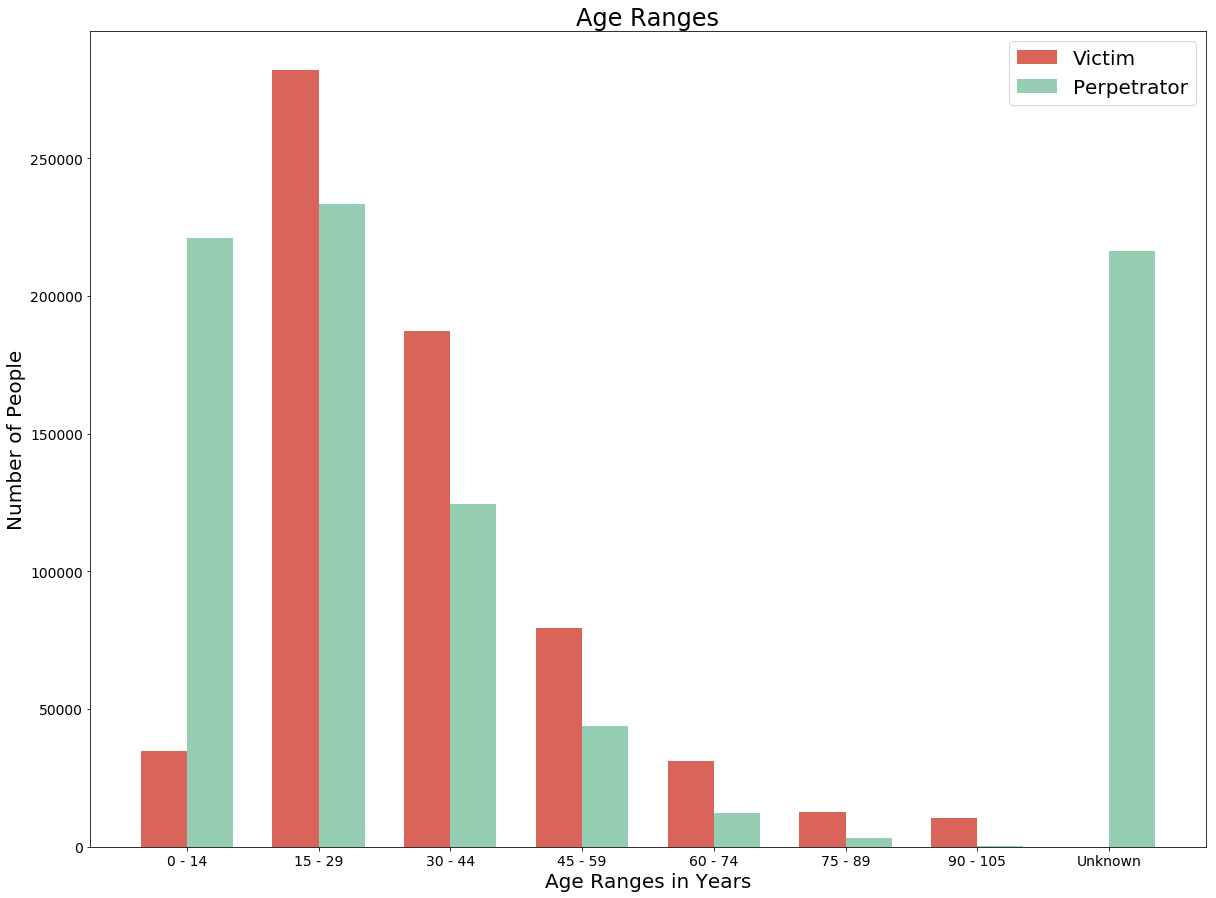

In [399]:
groups = 8
index = np.arange(groups) 
bar_width = 0.35
fig, ax = plt.subplots(figsize=(20, 15))
victim = ax.bar(index, list(age_df.values[0]), bar_width,
                color='#d96459',
                label='Victim')
perpetrator = ax.bar(index + bar_width, list(age_df.values[1]), bar_width,
                color='#96ceb4',
                label='Perpetrator')
ax.set_xlabel('Age Ranges in Years', fontsize=20)
ax.set_ylabel('Number of People', fontsize=20)
ax.set_title('Age Ranges')
ax.title.set_size(fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('0 - 14', '15 - 29', '30 - 44', '45 - 59', '60 - 74', '75 - 89', '90 - 105', 'Unknown'))
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(prop={'size': 20})
plt.show()

In [ ]:
spread = sorted(age_list)
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

In [475]:
sorted_age = sorted(age_list)
median_age = sorted_age[int(np.median(sorted_age))]
q1 = int(np.median(sorted_age[:sorted_age.index(median_age) + 1]))
q2 = int(np.median(sorted_age[sorted_age.index(median_age):]))

In [478]:
int(np.median(sorted_age[:sorted_age.index(median_age) + 1]))

25

In [400]:
relationship

Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

In [437]:
r_d = {'Spouse/SO': 0,
                  'Friend': 0,
                  'Parent': 0,
                  'Child': 0,
                  'Ex-Spouse': 0,
                  'Family': 0,
                  'Neighbor': 0,
                  'Work': 0,
                  'Unknown': 0,
                  'Stranger': 0}
so = ['Wife', 'Girlfriend', 'Husband', 'Boyfriend', 'Common-Law Wife', 'Common-Law Husband', 'Boyfriend/Girlfriend']
friend = ['Acquaintance', 'Friend']
parent = ['Father', 'Mother', 'Stepfather', 'Stepmother', 'In-Law']
child = ['Son', 'Daughter', 'Stepson', 'Stepdaughter']
ex = ['Ex-Husband', 'Ex-Wife']
family = ['Family', 'Sister', 'Brother']
work = ['Employer', 'Employee']

In [520]:
relationship_list = list(relationship.index)
relationship_count = list(relationship.values)
for i in range(len(relationship_list)):
    if relationship_list[i] in so:
        r_d['Spouse/SO'] += relationship_count[i]
    if relationship_list[i] in friend:
        r_d['Friend'] += relationship_count[i]
    if relationship_list[i] in parent:
        r_d['Parent'] += relationship_count[i]
    if relationship_list[i] in child:
        r_d['Child'] += relationship_count[i]
    if relationship_list[i] in ex:
        r_d['Ex-Spouse'] += relationship_count[i]
    if relationship_list[i] in family:
        r_d['Family'] += relationship_count[i]
    if relationship_list[i] in work:
        r_d['Work'] += relationship_count[i]
    if relationship_list[i] == 'Unknown':
        r_d['Unknown'] += relationship_count[i]
    if relationship_list[i] == 'Stranger':
        r_d['Stranger'] += relationship_count[i]
    if relationship_list[i] == 'Neighbor':
        r_d['Neighbor'] += relationship_count[i]

In [439]:
r_d

{'Child': 19367,
 'Ex-Spouse': 2602,
 'Family': 16341,
 'Friend': 147963,
 'Neighbor': 6294,
 'Parent': 13817,
 'Spouse/SO': 61571,
 'Stranger': 96593,
 'Unknown': 273013,
 'Work': 893}

In [440]:
sum(list(r_d.values())) == relationship.sum()

True

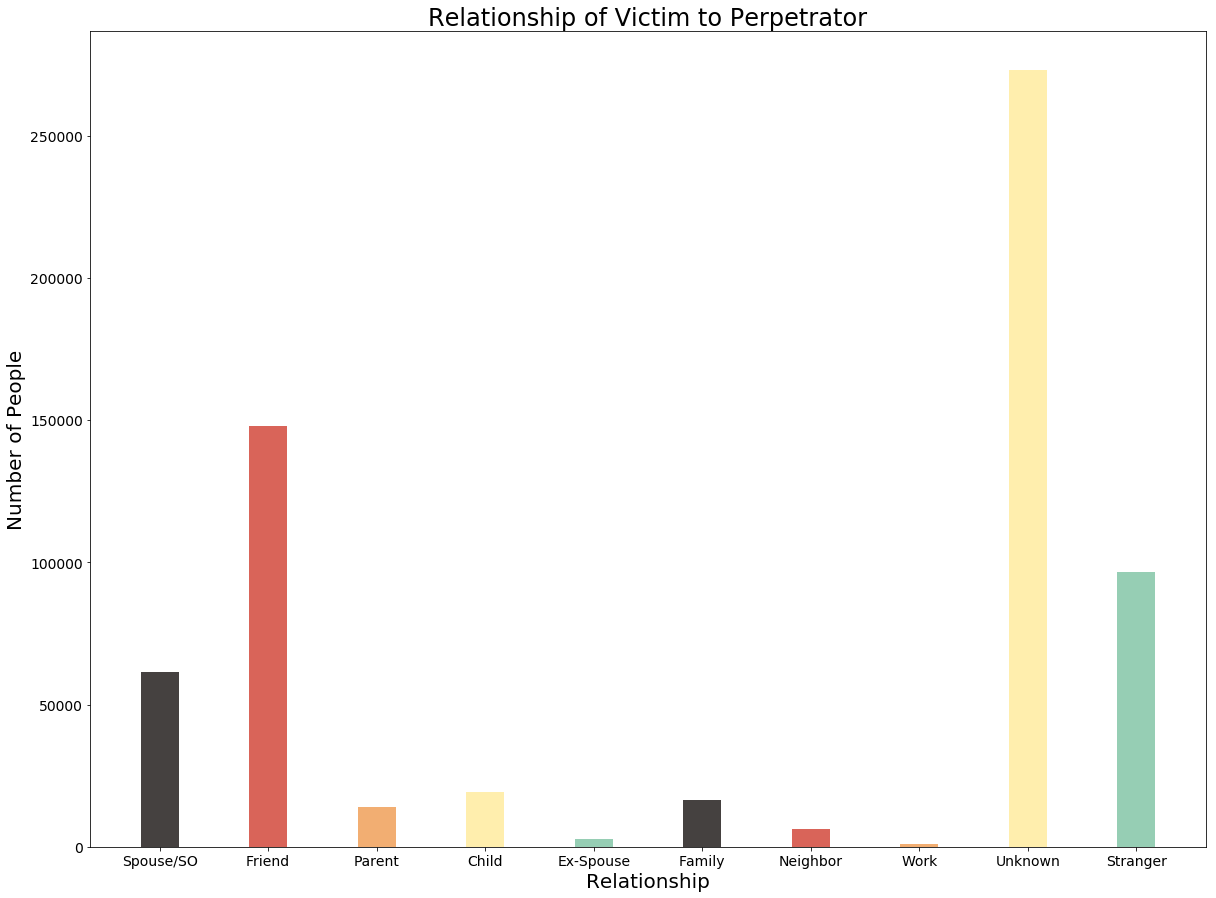

In [453]:
colors = ['#454140', '#d96459', '#f2ae72', '#ffeead', '#96ceb4', '#454140', '#d96459', '#f2ae72', '#ffeead', '#96ceb4']
groups = 10
bar_width = 0.35
index = np.arange(groups) 
fig, ax = plt.subplots(figsize=(20, 15))
ax.bar(index, list(r_d.values()), bar_width,
                color=colors)
ax.set_xlabel('Relationship', fontsize=20)
ax.set_ylabel('Number of People', fontsize=20)
ax.set_title('Relationship of Victim to Perpetrator')
ax.title.set_size(fontsize=24)
ax.set_xticks(index)
ax.set_xticklabels(list(r_d.keys()))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()